In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [63]:
def get_feature_matrix(masstime, data, significant=True):
    if not significant:
        return data.iloc[3:,8:].to_numpy(dtype=float).T
    inds=[]
    for i in range(3,data.shape[0]):
        mt=data.iloc[i,4] + '@' + data.iloc[i,5]
        if mt in masstime:
            inds.append(i)
    inds=np.asarray(inds, dtype=int)
    return data.iloc[inds,8:].to_numpy(dtype=float).T

def get_features(masstime, data, significant=True):
    if not significant:
        return data
    inds=[0,1,2]
    for i in range(3,data.shape[0]):
        mt=data.iloc[i,4] + '@' + data.iloc[i,5]
        if mt in masstime:
            inds.append(i)
    inds=np.asarray(inds, dtype=int)
    return data.iloc[inds,:]


def get_ids(data):
    ID=[]
    for line in data.iloc[2,8:]:
        ID.append(line.split('_')[-1].split('.')[0])
    return np.array(ID)

def add_noise(x, magnitude):
    return x + np.random.normal(0,magnitude, x.shape)

In [18]:
path_s = "../../PDproj/cellresults/ttest/ALPHA0.05FC1.0MINVAR0.125/"
filenames_s = [line.split('\n')[0] for line in open(path_s + "filenames.txt")]
filenames_s

['cellshilicneg_log2.csvALPHA0.05FC1.0MINVAR0.125.csv',
 'cellshilicpos_log2.csvALPHA0.05FC1.0MINVAR0.125.csv',
 'cellslipidomicsneg_log2.csvALPHA0.05FC1.0MINVAR0.125.csv',
 'cellslipidomicspos_log2.csvALPHA0.05FC1.0MINVAR0.125.csv',
 'cellsRPneg_log2.csvALPHA0.05FC1.0MINVAR0.125.csv',
 'cellsRPpos_log2.csvALPHA0.05FC1.0MINVAR0.125.csv',
 'mediumHILICneg_log2.csvALPHA0.05FC1.0MINVAR0.125.csv',
 'mediumHILICpos_log2.csvALPHA0.05FC1.0MINVAR0.125.csv',
 'mediumRPneg_log2.csvALPHA0.05FC1.0MINVAR0.125.csv',
 'mediumRPpos_log2.csvALPHA0.05FC1.0MINVAR0.125.csv']

In [19]:
path_s2 = "../../PDproj/cellresults/ttest/withGF/ALPHA0.05FC1.0MINVAR0.125/"
filenames_s2 = [line.split('\n')[0] for line in open(path_s2 + "filenames.txt")]
filenames_s2

['cellshilicnegALPHA0.05FC1.0MINVAR0.125.csv',
 'cellshilicposALPHA0.05FC1.0MINVAR0.125.csv',
 'cellslipidnegALPHA0.05FC1.0MINVAR0.125.csv',
 'cellslipidposALPHA0.05FC1.0MINVAR0.125.csv',
 'cellsRPnegALPHA0.05FC1.0MINVAR0.125.csv',
 'cellsRPposALPHA0.05FC1.0MINVAR0.125.csv',
 'mediumhilicnegALPHA0.05FC1.0MINVAR0.125.csv',
 'mediumhilicposALPHA0.05FC1.0MINVAR0.125.csv',
 'mediumRPnegALPHA0.05FC1.0MINVAR0.125.csv',
 'mediumRPposALPHA0.05FC1.0MINVAR0.125.csv']

In [20]:
path = "../../PDproj/celldata/clean/"
filenames = [line.split('\n')[0] for line in open(path + "filenames.txt")]
filenames

['cellshilicneg_log2.csv',
 'cellshilicpos_log2.csv',
 'cellslipidomicsneg_log2.csv',
 'cellslipidomicspos_log2.csv',
 'cellsRPneg_log2.csv',
 'cellsRPpos_log2.csv',
 'mediumHILICneg_log2.csv',
 'mediumHILICpos_log2.csv',
 'mediumRPneg_log2.csv',
 'mediumRPpos_log2.csv']

In [49]:
fnum=9 # 2 is good example
data = pd.read_csv(path + filenames[fnum], sep=';', header=None)
tle = filenames[fnum].split('_')[0]
df = pd.read_csv(path_s + filenames_s[fnum],sep=';')
df_GF = pd.read_csv(path_s2 + filenames_s2[fnum],sep=';')

In [50]:
print(filenames[fnum])
print(filenames_s[fnum])
print(filenames_s2[fnum])

mediumRPpos_log2.csv
mediumRPpos_log2.csvALPHA0.05FC1.0MINVAR0.125.csv
mediumRPposALPHA0.05FC1.0MINVAR0.125.csv


### Get significant features with GAP status

In [97]:
pathGF = "../../PDproj/celldata/datawithGFstatus/clean/"
filenamesGF = [line.split('\n')[0] for line in open(pathGF + "filenames.txt")]
GF = pd.read_csv(pathGF + filenamesGF[fnum],sep=';', header=None)

In [98]:
masstime = df_GF[' masstime'].to_numpy()
GF=get_features(masstime, GF, True)
keep = [i for i in range(0,GF.shape[1]) if i not in np.arange(8,88)]
GF=GF.iloc[:,keep]

In [99]:
GF.shape

(80, 48)

In [100]:
GF.head()

,0,1,2,3,4,5,6,7,88,89,...,118,119,120,121,122,123,124,125,126,127
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Name,Formula,Annot. DeltaMass [ppm],Calc. MW,m/z,RT [min],MS2,Reference Ion,Gap Fill Status: 220927_SarkaLehtonen_RP_pos_0...,Gap Fill Status: 220927_SarkaLehtonen_RP_pos_0...,...,Gap Fill Status: 220927_SarkaLehtonen_RP_pos_0...,Gap Fill Status: 220927_SarkaLehtonen_RP_pos_0...,Gap Fill Status: 220927_SarkaLehtonen_RP_pos_0...,Gap Fill Status: 220927_SarkaLehtonen_RP_pos_0...,Gap Fill Status: 220927_SarkaLehtonen_RP_pos_0...,Gap Fill Status: 220927_SarkaLehtonen_RP_pos_0...,Gap Fill Status: 220927_SarkaLehtonen_RP_pos_0...,Gap Fill Status: 220927_SarkaLehtonen_RP_pos_0...,Gap Fill Status: 220927_SarkaLehtonen_RP_pos_0...,Gap Fill Status: 220927_SarkaLehtonen_RP_pos_0...
20,NaN,C10 H18 N4 O2 S,2.63,258.11573,130.06514,2.948,DDA for other ion,[M+2H]+2,128,128,...,128,128,128,128,128,128,128,128,128,128
21,NaN,C9 H7 N,0.24,129.05788,130.06516,2.95,DDA for preferred ion,[M+H]+1,0,0,...,128,128,128,0,0,128,0,0,0,0


In [101]:
aSYN=GF.iloc[:,8:18]
comb=GF.iloc[:,18:28]
INFg=GF.iloc[:,28:38]
UT=GF.iloc[:,38:]

In [111]:
tol=10
token=8
inds=[]
ls=['aSYN','comb','INFg','UT']
for k, group in enumerate([aSYN,comb,INFg,UT]):
    for i in range(3,group.shape[0]):
        arr=np.asarray(group.iloc[i,:], dtype=int)
        s=np.sum(arr==token)
        if s>=tol:
            inds.append((ls[k],i))

In [112]:
inds

[('aSYN', 9)]

In [113]:
GF.iloc[9,:]

0       2-Pyridylacetic acid
1                 C7 H7 N O2
2                       0.67
3                  137.04777
4                  138.05501
5                      4.131
6      DDA for preferred ion
7                    [M+H]+1
88                         8
89                         8
90                         8
91                         8
92                         8
93                         8
94                         8
95                         8
96                         8
97                         8
98                         0
99                         0
100                      128
101                        0
102                      128
103                      128
104                        0
105                      128
106                      128
107                        0
108                        0
109                        0
110                      128
111                      128
112                        0
113                        0
114           

### Get significant features by matching masstimes

In [96]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aSYN,aSYN,...,UT,UT,UT,UT,UT,UT,UT,UT,UT,UT
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,9,...,6,11,15,17,24,28,37,39,42,45
2,Name,Formula,Annot. DeltaMass [ppm],Calc. MW,m/z,RT [min],MS2,Reference Ion,Area: 220927_SarkaLehtonen_RP_pos_0029.raw (F24),Area: 220927_SarkaLehtonen_RP_pos_0034.raw (F29),...,Area: 220927_SarkaLehtonen_RP_pos_0030.raw (F25),Area: 220927_SarkaLehtonen_RP_pos_0036.raw (F31),Area: 220927_SarkaLehtonen_RP_pos_0040.raw (F35),Area: 220927_SarkaLehtonen_RP_pos_0041.raw (F36),Area: 220927_SarkaLehtonen_RP_pos_0049.raw (F44),Area: 220927_SarkaLehtonen_RP_pos_0053.raw (F48),Area: 220927_SarkaLehtonen_RP_pos_0060.raw (F55),Area: 220927_SarkaLehtonen_RP_pos_0062.raw (F57),Area: 220927_SarkaLehtonen_RP_pos_0065.raw (F60),Area: 220927_SarkaLehtonen_RP_pos_0068.raw (F63)
3,Phenylacetaldehyde,C8 H8 O,-0.82,120.05742,121.06469,7.643,No MS2,[M+H]+1,18.2048845502699,18.1234165107514,...,18.4539125488332,18.4139955325904,15.8848774804331,17.7505569875904,18.6192815840842,17.8732648146544,18.15100377887,18.312293082204,18.4516109883294,17.9375375423966
4,Phenylacetaldehyde,C8 H8 O,1.31,120.05767,121.06495,5.073,No MS2,[M+H]+1,17.7718248288481,17.276550272502,...,18.0292020617119,17.5736866741188,15.8773520931605,17.0738873537124,18.0365507167662,17.3789131728434,17.3308660444964,16.8452953443086,17.7317156905148,17.3008218265265


In [91]:
masstime = df[' masstime'].to_numpy()
groups=data.iloc[0,8:]
labels = LabelEncoder().fit_transform(groups)
ID=get_ids(data)
x=get_feature_matrix(masstime, data, True)
assert(x.shape[0]==40)

In [53]:
pca = PCA().fit_transform(x)
pca = add_noise(pca, 1)

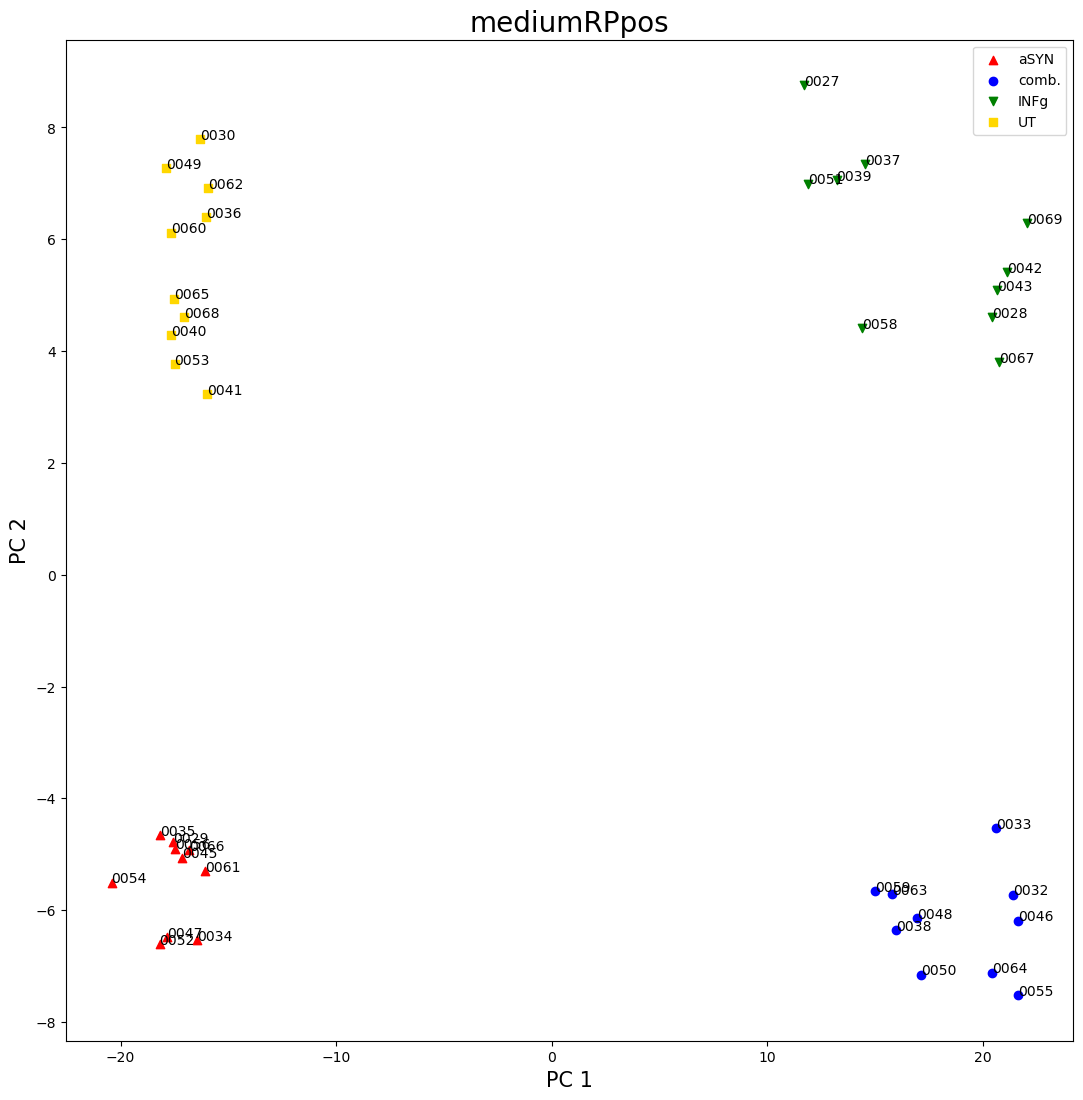

In [54]:
SAVE=False
k=1
fig, ax = plt.subplots(figsize=(13,13))
ax.scatter(pca[:10,0],pca[:10,k], marker='^', c='red')
ax.scatter(pca[10:20,0],pca[10:20,k], marker='o', c='blue')
ax.scatter(pca[20:30,0],pca[20:30,k], marker='v', c='green')
ax.scatter(pca[30:,0],pca[30:,k], marker='s', c='gold')
ax.legend(['aSYN','comb.','INFg','UT'])

for i, txt in enumerate(ID):
    ax.annotate(txt, (pca[i,0], pca[i,k]),fontsize=10)
plt.xlabel('PC 1', fontsize=15)
plt.ylabel('PC {}'.format(k+1), fontsize=15)
plt.title(tle, fontsize=20)
plt.show()

if SAVE:
    fig.savefig('../../PDproj/paavo/plots/pca/eps/{}.eps'.format(tle))
    fig.savefig('../../PDproj/paavo/plots/pca/tifs/{}.tif'.format(tle))
    fig.savefig('../../PDproj/paavo/plots/pca/jpeg/{}.jpg'.format(tle))